In [413]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [ ]:
#titanic_with_dummies = pd.get_dummies(data = df3, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )

In [266]:
df_test = pd.read_csv("..\\project 1\\resale-flat-prices-based-on-registration-date-from-jan-2017-2021-aug.csv")

In [642]:
df_test.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [643]:
df_test.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [267]:

df_test_with_dummies = pd.get_dummies(data = df_test, columns = ['flat_model', 'flat_type', 'town','storey_range'], 
                                      prefix = ['flat_model', 'flat_type', 'town','storey_range'] )

In [268]:
df_test_with_dummies

,month,block,street_name,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,2017-01,406,ANG MO KIO AVE 10,44.0,1979,61 years 04 months,232000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01,108,ANG MO KIO AVE 4,67.0,1978,60 years 07 months,250000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01,602,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,262000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01,465,ANG MO KIO AVE 10,68.0,1980,62 years 01 month,265000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01,601,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,265000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08,328,YISHUN RING RD,146.0,1988,65 years 11 months,690000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
105471,2021-08,277,YISHUN ST 22,146.0,1985,63 years 01 month,620000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105472,2021-08,281,YISHUN ST 22,152.0,1985,62 years 11 months,685000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105473,2021-08,614,YISHUN ST 61,142.0,1987,64 years 09 months,650000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [269]:
df_test_with_dummies['month']=pd.to_datetime(df['month'])

In [270]:
df_test_with_dummies['year_only']= df_test_with_dummies['month'].dt.year

In [271]:
df_test_with_dummies

,month,block,street_name,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,year_only
0,2017-01-01,406,ANG MO KIO AVE 10,44.0,1979,61 years 04 months,232000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
1,2017-01-01,108,ANG MO KIO AVE 4,67.0,1978,60 years 07 months,250000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
2,2017-01-01,602,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,262000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
3,2017-01-01,465,ANG MO KIO AVE 10,68.0,1980,62 years 01 month,265000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
4,2017-01-01,601,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,265000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,328,YISHUN RING RD,146.0,1988,65 years 11 months,690000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
105471,2021-08-01,277,YISHUN ST 22,146.0,1985,63 years 01 month,620000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
105472,2021-08-01,281,YISHUN ST 22,152.0,1985,62 years 11 months,685000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
105473,2021-08-01,614,YISHUN ST 61,142.0,1987,64 years 09 months,650000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021


In [272]:
df_test_with_dummies['remaining_lease_year']=df_test_with_dummies['remaining_lease'].str.slice(0,2)

In [273]:
df_test_with_dummies

,month,block,street_name,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,year_only,remaining_lease_year
0,2017-01-01,406,ANG MO KIO AVE 10,44.0,1979,61 years 04 months,232000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,61
1,2017-01-01,108,ANG MO KIO AVE 4,67.0,1978,60 years 07 months,250000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,60
2,2017-01-01,602,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,262000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,62
3,2017-01-01,465,ANG MO KIO AVE 10,68.0,1980,62 years 01 month,265000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,62
4,2017-01-01,601,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,265000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,328,YISHUN RING RD,146.0,1988,65 years 11 months,690000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,65
105471,2021-08-01,277,YISHUN ST 22,146.0,1985,63 years 01 month,620000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,63
105472,2021-08-01,281,YISHUN ST 22,152.0,1985,62 years 11 months,685000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,62
105473,2021-08-01,614,YISHUN ST 61,142.0,1987,64 years 09 months,650000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,64


In [274]:
df_test_with_dummies.columns

Index(['month', 'block', 'street_name', 'floor_area_sqm',
       'lease_commence_date', 'remaining_lease', 'resale_price',
       'flat_model_2-room', 'flat_model_Adjoined flat', 'flat_model_Apartment',
       'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Improved-Maisonette', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_Model A-Maisonette',
       'flat_model_Model A2', 'flat_model_Multi Generation',
       'flat_model_New Generation', 'flat_model_Premium Apartment',
       'flat_model_Premium Apartment Loft', 'flat_model_Premium Maisonette',
       'flat_model_Simplified', 'flat_model_Standard', 'flat_model_Terrace',
       'flat_model_Type S1', 'flat_model_Type S2', 'flat_type_1 ROOM',
       'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJA

In [275]:
pd.set_option("display.max_columns",None)

In [282]:
y_dummies=df_test_with_dummies['resale_price']
X_dummies=df_test_with_dummies[[cols for cols in df_test_with_dummies.columns if cols != 'block' and cols != 'street_name'and cols != 'month'and cols != 'remaining_lease' and cols != 'resale_price' ]]

In [677]:
X.columns

Index(['floor_area_sqm', 'lease_commence_date', 'month_only',
       'flat_model_number', 'storey_range_number', 'town_number',
       'flat_type_number', 'remaining_lease_year'],
      dtype='object')

In [676]:
X_dummies.columns

Index(['floor_area_sqm', 'lease_commence_date', 'flat_model_2-room',
       'flat_model_Adjoined flat', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Improved-Maisonette',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
       'flat_model_Premium Maisonette', 'flat_model_Simplified',
       'flat_model_Standard', 'flat_model_Terrace', 'flat_model_Type S1',
       'flat_model_Type S2', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION', 'town_ANG MO KIO',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 

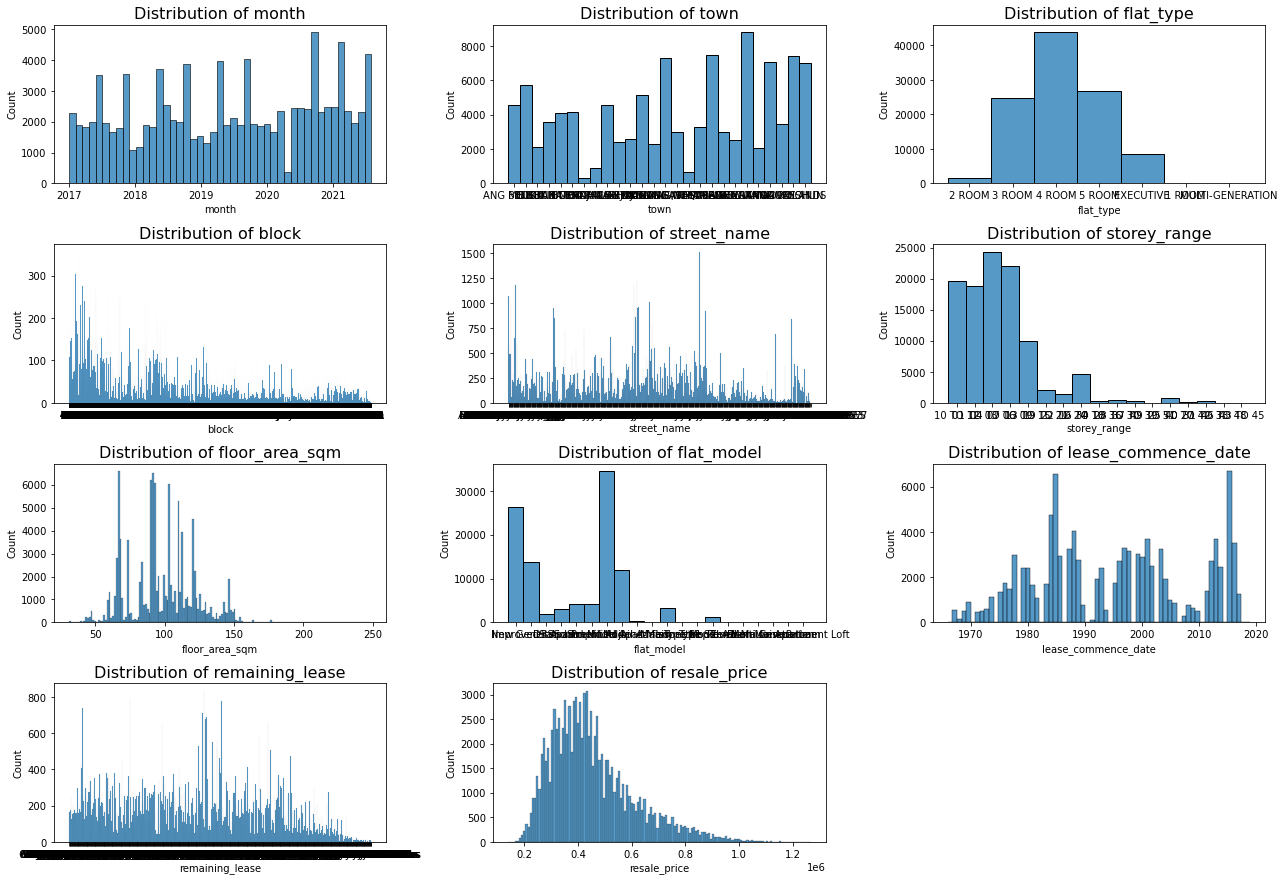

In [678]:
plt.figure(figsize = (18,18))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in df_test.columns:
    plt.subplot(6,3,num)
    sns.histplot(data=df, x=cols) #hue='red_wine' add into can split the red wine values 1/0 to see difference
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'y' is not defined

In [283]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies,y_dummies,test_size=0.2, random_state=42)

In [284]:
Linear_r.fit(X_train_dummies,y_train_dummies)
Linear_r.score(X_test_dummies, y_test_dummies)

0.8625137738324865

In [285]:
X_dummies.columns

Index(['floor_area_sqm', 'lease_commence_date', 'flat_model_2-room',
       'flat_model_Adjoined flat', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Improved-Maisonette',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
       'flat_model_Premium Maisonette', 'flat_model_Simplified',
       'flat_model_Standard', 'flat_model_Terrace', 'flat_model_Type S1',
       'flat_model_Type S2', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION', 'town_ANG MO KIO',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 

In [286]:
coeff_df=pd.DataFrame(Linear_r.coef_,X_dummies.columns,columns=['Coefficient'])
coeff_df

,Coefficient
floor_area_sqm,3572.505880
lease_commence_date,3507.376245
flat_model_2-room,-100539.406879
flat_model_Adjoined flat,-20477.099901
flat_model_Apartment,-42284.711164
...,...
storey_range_43 TO 45,103409.317944
storey_range_46 TO 48,71945.361049
storey_range_49 TO 51,96329.508020
year_only,6859.074863


In [302]:
y_predicted_test12=Linear_r.predict(X_test_dummies)
test12=pd.DataFrame({'Acutal':y_test_dummies,'Predicted':y_predicted_test12})
test12

,Acutal,Predicted
22467,575000.0,466238.252509
47296,428000.0,388441.242057
68977,295000.0,396745.230678
2280,290000.0,298650.637553
95521,390000.0,369707.227250
...,...,...
79135,585000.0,547427.120800
104277,425000.0,401526.671614
77266,380000.0,339047.022107
84780,480000.0,513190.914783


In [322]:
y_predicted_test13=Linear_r.predict(X_dummies)

In [325]:
test13=pd.DataFrame({'Acutal':y_dummies,'Predicted':y_predicted_test13})
test13

,Acutal,Predicted
0,232000.0,175037.291373
1,250000.0,264007.840412
2,262000.0,273595.012743
3,265000.0,294131.998171
4,265000.0,273595.012743
...,...,...
105470,690000.0,644497.400445
105471,620000.0,609624.922187
105472,685000.0,612809.267995
105473,650000.0,582678.538928


In [333]:
X_dummies.iloc[[6]]

,floor_area_sqm,lease_commence_date,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,year_only,remaining_lease_year
6,68.0,1979,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,61


In [334]:
Linear_r.predict(X_dummies.iloc[[6]])

array([289338.41200585])

In [341]:
test_iloc6=pd.DataFrame({'Acutal':y_dummies.iloc[0:6],'Predicted':Linear_r.predict(X_dummies.iloc[0:6])})
test_iloc6

,Acutal,Predicted
0,232000.0,175037.291373
1,250000.0,264007.840412
2,262000.0,273595.012743
3,265000.0,294131.998171
4,265000.0,273595.012743
5,275000.0,281961.104787


In [635]:
X_dummies.iloc[1:6]

,floor_area_sqm,lease_commence_date,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,year_only,remaining_lease_year
1,67.0,1978,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,60
2,67.0,1980,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,62
3,68.0,1980,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,62
4,67.0,1980,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,62
5,68.0,1981,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,63


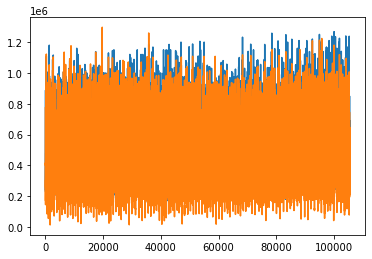

In [326]:
plt.plot(test13)

In [344]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [636]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train_dummies,y_train_dummies)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, Linear_r.coef_))

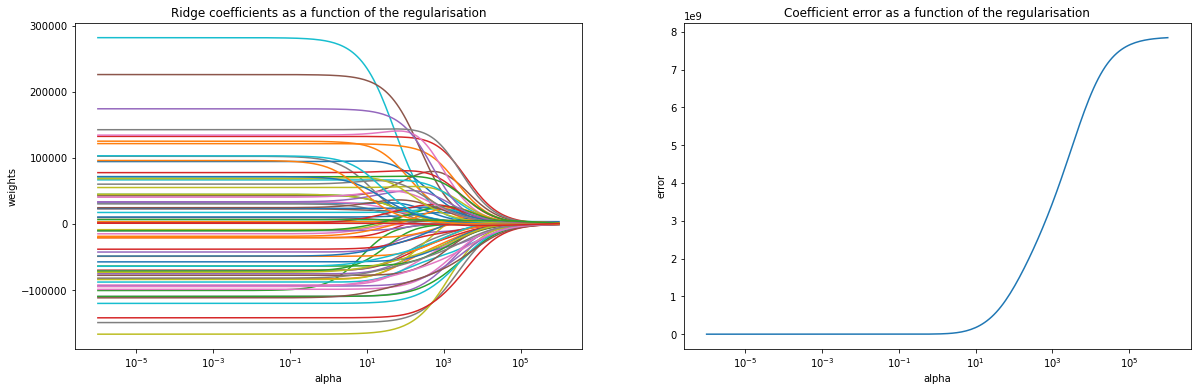

In [637]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [638]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_test_dummies, y_test_dummies)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_test_dummies, y_test_dummies))

Alpha: 0.5353566677410719
Score: 0.8633280276617694


In [350]:
optimal_ridge.predict(X_dummies.iloc[[6]])

array([290975.9918583])

In [351]:
Linear_r.predict(X_dummies.iloc[[6]])

array([289338.41200585])

In [356]:
from sklearn.linear_model import Lasso, LassoCV
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [370]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lasso = Lasso()
# keep track of the intermediate results for coefficients and errors
coefs_lasso = []
errors_lasso = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)
# Train the model with different regularisation strengths
for a in lasso_alphas:
    lasso.set_params(alpha = a,tol=1,max_iter=1000)
    lasso.fit(X_train_dummies,y_train_dummies)
    coefs_lasso.append(lasso.coef_)
    errors_lasso.append(mean_squared_error(lasso.coef_, Linear_r.coef_))

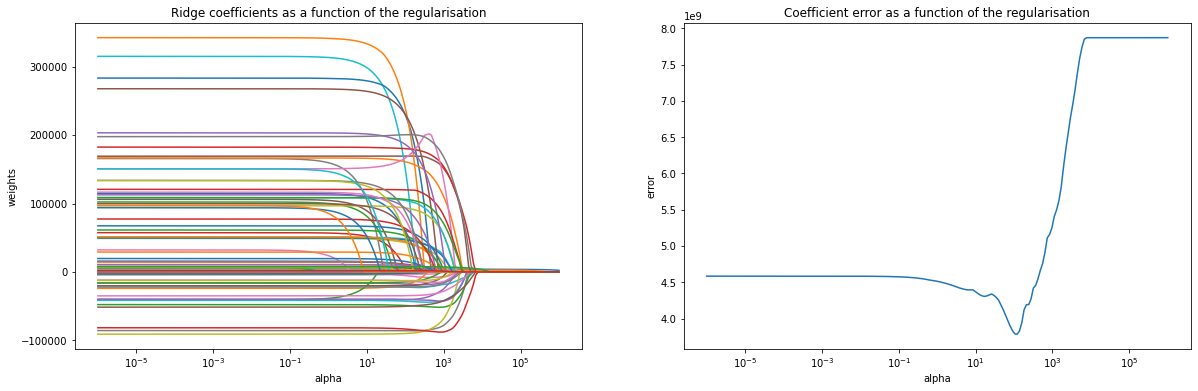

In [371]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [373]:
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10,tol=1,max_iter=1000)
optimal_lasso.fit(X_train_dummies,y_train_dummies)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_train_dummies,y_train_dummies))

Alpha: 1e-06
Score: 0.8564765473608389


In [396]:
ans=1000
print('Optimal ridge:',optimal_ridge.predict(X_dummies.iloc[[ans]]))
print('Linear:',Linear_r.predict(X_dummies.iloc[[ans]]))
print('optimal lasso:',optimal_lasso.predict(X_dummies.iloc[[ans]]))
print('Acutal:', y_dummies.iloc[ans])
print('Avg of all predictions',sum(optimal_ridge.predict(X_dummies.iloc[[ans]])+Linear_r.predict(X_dummies.iloc[[ans]])+optimal_lasso.predict(X_dummies.iloc[[ans]]))/3)

Optimal ridge: [293680.95929626]
Linear: [289338.41200585]
optimal lasso: [291692.97634604]
Acutal: 268000.0
Avg of all predictions 292610.6642907684


In [414]:
y_predict_Linear_r_test=Linear_r.predict(X_test_dummies)
y_predict_Ridge_test=optimal_ridge.predict(X_test_dummies)
y_predict_Lasso_test=optimal_lasso.predict(X_test_dummies)


In [421]:
r2_score_Linear_r=r2_score(y_test_dummies,y_predict_Linear_r_test)
r2_score_Ridge=r2_score(y_test_dummies,y_predict_Ridge_test)
r2_score_Lasso=r2_score(y_test_dummies,y_predict_Lasso_test)
print('R2 score Linear Regression:', r2_score_Linear_r)
print('R2 score Ridge:', r2_score_Ridge)
print('R2 score Lasso:', r2_score_Lasso)

R2 score Linear Regression: 0.8625137738324865
R2 score Ridge: 0.8633280276617694
R2 score Lasso: 0.8556270353648885


In [423]:
print('Linear Regression Mean Absolute Error: ',metrics.mean_absolute_error(y_test_dummies,y_predict_Linear_r_test))
print('Linear Regression Mean Squared Error: ',metrics.mean_squared_error(y_test_dummies,y_predict_Linear_r_test))
print('Linear Regression Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test_dummies,y_predict_Linear_r_test)))

Linear Regression Mean Absolute Error:  45300.99866489833
Linear Regression Mean Squared Error:  3424397706.8193116
Linear Regression Root Mean Squared Error:  58518.35358944501


In [424]:
print('Ridge Regression Mean Absolute Error: ',metrics.mean_absolute_error(y_test_dummies,y_predict_Ridge_test))
print('Ridge Regression Mean Squared Error: ',metrics.mean_squared_error(y_test_dummies,y_predict_Ridge_test))
print('Ridge Regression Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test_dummies,y_predict_Ridge_test)))

Ridge Regression Mean Absolute Error:  45190.905322895174
Ridge Regression Mean Squared Error:  3404116919.2561426
Ridge Regression Root Mean Squared Error:  58344.81055977594


In [425]:
print('Lasso Regression Mean Absolute Error: ',metrics.mean_absolute_error(y_test_dummies,y_predict_Lasso_test))
print('Lasso Regression Mean Squared Error: ',metrics.mean_squared_error(y_test_dummies,y_predict_Lasso_test))
print('Lasso Regression Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test_dummies,y_predict_Lasso_test)))

Lasso Regression Mean Absolute Error:  46113.61132162207
Lasso Regression Mean Squared Error:  3595927117.9704595
Lasso Regression Root Mean Squared Error:  59966.04971123627


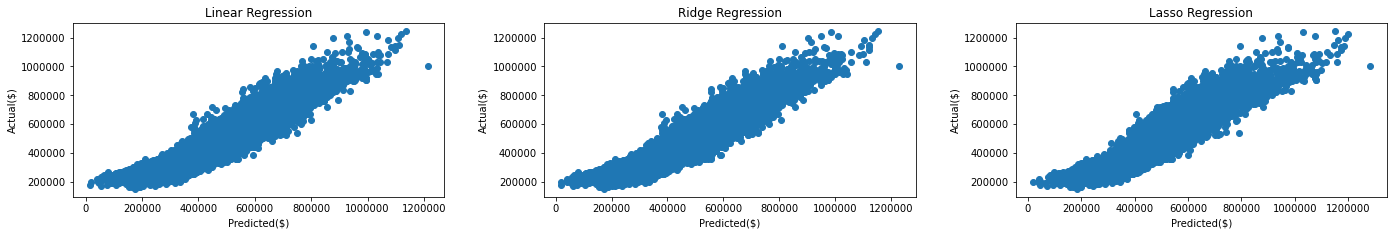

In [674]:
plt.figure(figsize = (20,10))
plt.subplot(331)
plt.scatter(Linear_r.predict(X_test_dummies),y_test_dummies)
plt.title('Linear Regression')
plt.xlabel('Predicted($)')
plt.ylabel('Actual($)')
plt.ticklabel_format(axis='both',style='plain')


plt.subplot(332)
plt.scatter(optimal_ridge.predict(X_test_dummies),y_test_dummies)
plt.title('Ridge Regression')
plt.xlabel('Predicted($)')
plt.ylabel('Actual($)')
plt.ticklabel_format(axis='both',style='plain')


plt.subplot(333)
plt.scatter(optimal_lasso.predict(X_test_dummies),y_test_dummies)
plt.title('Lasso Regression')

plt.xlabel('Predicted($)')
plt.ylabel('Actual($)')
plt.ticklabel_format(axis='both',style='plain')
plt.tight_layout(pad=3.0)

In [622]:
Xtest1=X_dummies.iloc[[6]]
Xtest1

,floor_area_sqm,lease_commence_date,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,year_only,remaining_lease_year
6,68.0,1979,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,61


In [631]:
Xtest1.at[6,'year_only']=2023



In [632]:
Xtest1

,floor_area_sqm,lease_commence_date,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51,year_only,remaining_lease_year
6,68.0,1979,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023,61


In [640]:
print('Optimal ridge:',optimal_ridge.predict(Xtest1))
print('Optimal ridge:',optimal_ridge.predict(X_dummies.iloc[[6]]))

Optimal ridge: [338763.81376019]
Optimal ridge: [290975.9918583]


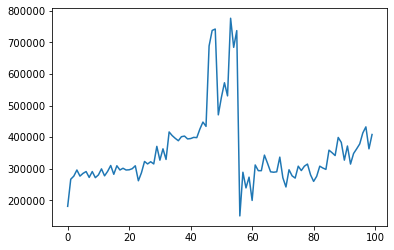

In [402]:
plt.plot(optimal_ridge.predict(X_dummies.iloc[0:100]))

In [404]:
y_predicted_Linear_r = Linear_r.predict(X_dummies)
y_predicted_Ridge = optimal_ridge.predict(X_dummies)
y_predicted_Lasso = optimal_lasso.predict(X_dummies)



In [484]:
test12=pd.DataFrame({'Actual':y_dummies,'Linear prediction':y_predicted_Linear_r,
                     'Ridge prediction':y_predicted_Ridge,'Lasso prediction':y_predicted_Lasso})
test12

,Actual,Linear prediction,Ridge prediction,Lasso prediction
0,232000.0,175037.291373,180768.152446,166079.323217
1,250000.0,264007.840412,266692.247175,253504.415615
2,262000.0,273595.012743,276539.155309,262606.248527
3,265000.0,294131.998171,295899.445925,283553.346083
4,265000.0,273595.012743,276539.155309,262606.248527
...,...,...,...,...
105470,690000.0,644497.400445,646959.048129,639079.014696
105471,620000.0,609624.922187,612882.890753,604686.142890
105472,685000.0,612809.267995,617149.864121,612975.930233
105473,650000.0,582678.538928,580121.049701,573713.685324


In [497]:
result=np.where(test12['Linear prediction']==13763.387207321823)

In [498]:
result

(array([1639], dtype=int64),)

In [501]:
test12.iloc[1639]

Actual               210000.000000
Linear prediction     13763.387207
Ridge prediction      12210.354857
Lasso prediction       4738.072949
Name: 1639, dtype: float64

In [408]:
test12['avg cal']=(test12['Linear prediction']+test12['Ridge prediction']+test12['Lasso prediction'])/3

In [409]:
test12

,Actual,Linear prediction,Ridge prediction,Lasso prediction,avg cal
0,232000.0,175037.291373,180768.152446,166079.323217,173961.589012
1,250000.0,264007.840412,266692.247175,253504.415615,261401.501067
2,262000.0,273595.012743,276539.155309,262606.248527,270913.472193
3,265000.0,294131.998171,295899.445925,283553.346083,291194.930060
4,265000.0,273595.012743,276539.155309,262606.248527,270913.472193
...,...,...,...,...,...
105470,690000.0,644497.400445,646959.048129,639079.014696,643511.821090
105471,620000.0,609624.922187,612882.890753,604686.142890,609064.651943
105472,685000.0,612809.267995,617149.864121,612975.930233,614311.687450
105473,650000.0,582678.538928,580121.049701,573713.685324,578837.757984


In [468]:
test12['Linear prediction']

0         175037.291373
1         264007.840412
2         273595.012743
3         294131.998171
4         273595.012743
              ...      
105470    644497.400445
105471    609624.922187
105472    612809.267995
105473    582678.538928
105474    558753.259426
Name: Linear prediction, Length: 105475, dtype: float64

In [480]:
prediction_test=Linear_r.predict(X_dummies)

In [481]:
sorted_prediction_test=np.sort(prediction_test,axis=0)

In [482]:
min(sorted_prediction_test)

13763.387207321823

In [477]:
prediction=Linear_r.predict(np.sort(X_dummies,axis=0))


#plt.scatter(test12['Actual'].iloc[0:10],test12['Linear prediction'].iloc[0:10])
#

13763.387207321823

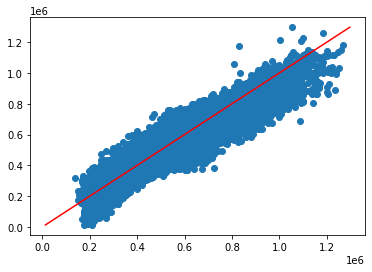

In [479]:
plt.scatter(test12['Actual'],test12['Linear prediction'])
plt.plot(sorted_prediction_test,sorted_prediction_test,color='red')

In [464]:
prediction

AttributeError: 'numpy.ndarray' object has no attribute 'info'

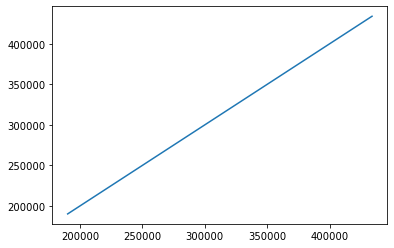

In [454]:
plt.plot(prediction[0:10500],prediction[0:10500])

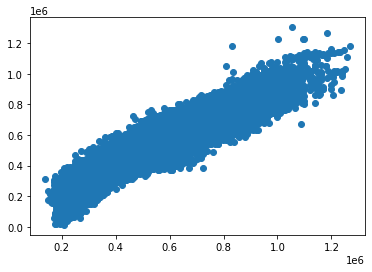

In [411]:
plt.scatter(test12['Actual'],test12['Ridge prediction'])

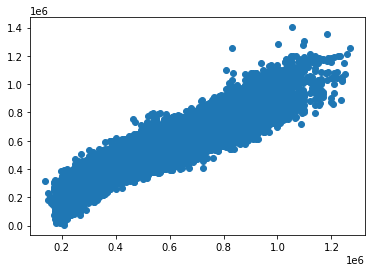

In [412]:
plt.scatter(test12['Actual'],test12['Lasso prediction'])

In [314]:
X_graph_len=[i for i in range(1,len(y_test_dummies)+1)]

In [315]:
len(X_graph_len)

21095

In [289]:
y_predicted = Linear_r.predict(X_test_dummies)
print("m: {0}".format(Linear_r.coef_))
print("b: {0}".format(Linear_r.intercept_))
print("R^2: "+ str(Linear_r.score(X_test_dummies, y_test_dummies)))

residuals = y_test_dummies-y_predicted

m: [   3572.50587952    3507.3762451  -100539.40687859  -20477.09990081
  -42284.7111641    42810.38591323  -92227.84111932  102734.20210669
   -8442.65758632  -87730.63195056   32297.25037039  -82938.8423461
   45045.06133599  -69841.03730519  -75188.08701559   23193.47600974
  -14667.87099388  -70312.40168464  -83866.59945447  282240.92251511
   94645.82753252  125550.06161589  -71348.59647675  -37991.95557362
  -10039.85018159    9917.46562586   33800.83109224   30617.04417787
   45045.06133599   17606.56747203   10698.9017533   121874.03037972
  -63566.80785883  132802.17439022 -109618.43175266  226400.02722172
  134682.56058808 -149068.79557145   55356.14735018   66999.45154113
  -57173.34127465  -48798.97134245 -109470.22028508   77905.23966147
  174574.03302114  -77558.37308089  -98815.44855077  142895.13983825
 -166622.82168882 -120036.05108997   23711.72222488  -20676.53248359
   71622.37407487 -141851.94274845  -93870.63178939 -111613.37298395
  -94648.89343491  -81764.162008

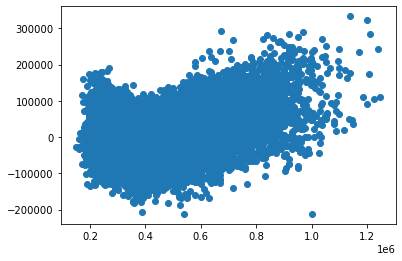

In [290]:
plt.scatter(y_test_dummies,residuals)

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   3.,   0.,   1.,
          0.,   0.,   0.,   3.,   1.,   1.,   3.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   5.,   1.,   3.,
          0.,   0.,   0.,   0.,   3.,   1.,   2.,   2.,   3.,   2.,   2.,
          3.,   2.,   5.,   3.,   2.,   2.,   1.,   0.,   3.,   1.,   3.,
          3.,   3.,   3.,   4.,   2., 

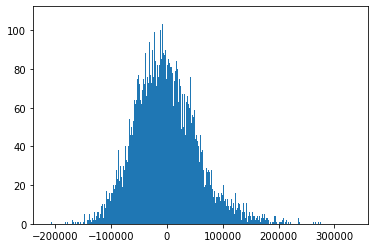

In [291]:
plt.hist(residuals,bins=1000)

array([466238.2525094 , 388441.24205665, 396745.23067755, ...,
       339047.02210689, 513190.91478273, 562723.57173803])

In [223]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test_dummies.shape[0]

r2_list = []
adjusted_r2_list = []

In [224]:
show_steps = True

In [225]:
## ANSWER
while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X_dummies.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        #included is a list, new column is also a list, when we add them together they combine into a bigger list
        fit = model.fit(X_train_dummies[included+[new_column]],y_train_dummies) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_test_dummies[included+[new_column]],y_test_dummies) # calculate the score (using test score)
        
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1-((1-r2)*((n-1))/(n-k-1)) # calculate the Adjusted R^2
        
        
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            r2_list.append(model.score(X_test[included+[new_column]],y_test_dummies))
            adjusted_r2_list.append(model.score(X_train_dummies[included+[new_column]],y_train_dummies))
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = town_BUKIT PANJANG, town_BUKIT BATOK, town_MARINE PARADE, town_TOA PAYOH, town_KALLANG/WHAMPOA, flat_model_2-room, town_BUKIT MERAH, flat_type_5 ROOM, flat_type_MULTI-GENERATION, town_PASIR RIS, flat_type_3 ROOM, flat_model_Type S2, flat_model_DBSS, flat_model_Improved, year_only, storey_range_01 TO 03, storey_range_19 TO 21, flat_model_Apartment, town_CHOA CHU KANG, town_CENTRAL AREA, town_WOODLANDS, storey_range_40 TO 42, town_BISHAN, storey_range_22 TO 24, town_SERANGOON, storey_range_13 TO 15, flat_model_Premium Maisonette, town_ANG MO KIO, floor_area_sqm, town_SENGKANG, town_GEYLANG, town_CLEMENTI, flat_type_1 ROOM, remaining_lease_year, flat_model_Standard, storey_range_10 TO 12, town_HOUGANG, storey_range_31 TO 33, storey_range_16 TO 18, flat_model_Improved-Maisonette, storey_range_49 TO 51, town_BEDOK, flat_type_2 ROOM, storey_range_25 TO 27, town_QUEENSTOWN, storey_range_07 TO 09, storey_range_46 TO 48, storey_range_37 TO 39, lease_commence_date, town_YISHUN

(Step) - Adjusted R^2: This = 0.005; Best = 0.386
(Step) Trying storey_range_28 TO 30...
(Step) - Features = storey_range_28 TO 30
(Step) - Adjusted R^2: This = 0.014; Best = 0.386
(Step) Trying flat_model_New Generation...
(Step) - Features = flat_model_New Generation
(Step) - Adjusted R^2: This = 0.086; Best = 0.386
(Step) Trying flat_model_Maisonette...
(Step) - Features = flat_model_Maisonette
(Step) - Adjusted R^2: This = 0.067; Best = 0.386
(Step) Trying flat_model_Terrace...
(Step) - Features = flat_model_Terrace
(Step) - Adjusted R^2: This = 0.003; Best = 0.386
(Step) Trying town_SEMBAWANG...
(Step) - Features = town_SEMBAWANG
(Step) - Adjusted R^2: This = 0.004; Best = 0.386
(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = flat_model_Premium Apartment Loft
(Step) - Adjusted R^2: This = 0.007; Best = 0.386
(Step) Trying town_JURONG WEST...
(Step) - Features = town_JURONG WEST
(Step) - Adjusted R^2: This = 0.008; Best = 0.386
(Step) Trying storey_range_04 T

(Step) - Adjusted R^2: This = 0.387; Best = 0.447
(Step) Trying storey_range_46 TO 48...
(Step) - Features = floor_area_sqm, storey_range_46 TO 48
(Step) - Adjusted R^2: This = 0.388; Best = 0.447
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, storey_range_37 TO 39
(Step) - Adjusted R^2: This = 0.402; Best = 0.447
(Step) Trying lease_commence_date...
(Step) - Features = floor_area_sqm, lease_commence_date
(Step) - Adjusted R^2: This = 0.447; Best = 0.447
(Step) - New Best!   : Feature = lease_commence_date; R^2 = 0.447; Adjusted R^2 = 0.447
(Step) Trying town_YISHUN...
(Step) - Features = floor_area_sqm, town_YISHUN
(Step) - Adjusted R^2: This = 0.397; Best = 0.447
(Step) Trying flat_type_4 ROOM...
(Step) - Features = floor_area_sqm, flat_type_4 ROOM
(Step) - Adjusted R^2: This = 0.387; Best = 0.447
(Step) Trying town_TAMPINES...
(Step) - Features = floor_area_sqm, town_TAMPINES
(Step) - Adjusted R^2: This = 0.386; Best = 0.447
(Step) Trying storey_range_43 

(Step) - Adjusted R^2: This = 0.448; Best = 0.496
(Step) Trying town_CHOA CHU KANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_CHOA CHU KANG
(Step) - Adjusted R^2: This = 0.467; Best = 0.496
(Step) Trying town_CENTRAL AREA...
(Step) - Features = floor_area_sqm, lease_commence_date, town_CENTRAL AREA
(Step) - Adjusted R^2: This = 0.469; Best = 0.496
(Step) Trying town_WOODLANDS...
(Step) - Features = floor_area_sqm, lease_commence_date, town_WOODLANDS
(Step) - Adjusted R^2: This = 0.481; Best = 0.496
(Step) Trying storey_range_40 TO 42...
(Step) - Features = floor_area_sqm, lease_commence_date, storey_range_40 TO 42
(Step) - Adjusted R^2: This = 0.455; Best = 0.496
(Step) Trying town_BISHAN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_BISHAN
(Step) - Adjusted R^2: This = 0.469; Best = 0.496
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, storey_range_22 TO 24
(Step) - Adjusted R^2: This = 0.457; Bes

(Step) - Adjusted R^2: This = 0.498; Best = 0.500
(Step) Trying town_MARINE PARADE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_MARINE PARADE
(Step) - Adjusted R^2: This = 0.506; Best = 0.500
(Step) - New Best!   : Feature = town_MARINE PARADE; R^2 = 0.506; Adjusted R^2 = 0.506
(Step) Trying town_TOA PAYOH...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_TOA PAYOH
(Step) - Adjusted R^2: This = 0.514; Best = 0.506
(Step) - New Best!   : Feature = town_TOA PAYOH; R^2 = 0.514; Adjusted R^2 = 0.514
(Step) Trying town_KALLANG/WHAMPOA...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_KALLANG/WHAMPOA
(Step) - Adjusted R^2: This = 0.514; Best = 0.514
(Step) - New Best!   : Feature = town_KALLANG/WHAMPOA; R^2 = 0.514; Adjusted R^2 = 0.514
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, flat_model_2-room
(Step) - Adjusted R^2: This = 0

(Step) - Adjusted R^2: This = 0.496; Best = 0.549
(Step) Trying town_JURONG EAST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_JURONG EAST
(Step) - Adjusted R^2: This = 0.497; Best = 0.549
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, storey_range_34 TO 36
(Step) - Adjusted R^2: This = 0.506; Best = 0.549
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, flat_model_Multi Generation
(Step) - Adjusted R^2: This = 0.497; Best = 0.549
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, flat_model_Premium Apartment
(Step) - Adjusted R^2: This = 0.501; Best = 0.549
(Step) Trying flat_type_EXECUTIVE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, flat_type_EXECUTIVE
(Step) - Adjusted R^2: This = 0.497; Best = 0.549
(Step) Trying

(Step) - Adjusted R^2: This = 0.566; Best = 0.596
(Step) Trying town_CENTRAL AREA...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, town_CENTRAL AREA
(Step) - Adjusted R^2: This = 0.574; Best = 0.596
(Step) Trying town_WOODLANDS...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, town_WOODLANDS
(Step) - Adjusted R^2: This = 0.576; Best = 0.596
(Step) Trying storey_range_40 TO 42...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, storey_range_40 TO 42
(Step) - Adjusted R^2: This = 0.553; Best = 0.596
(Step) Trying town_BISHAN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, town_BISHAN
(Step) - Adjusted R^2: This = 0.574; Best = 0.596
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, storey_range_22 TO 24
(Step) - Adjusted R^2: This

(Step) - Adjusted R^2: This = 0.555; Best = 0.596
(Step) Trying flat_model_New Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_New Generation
(Step) - Adjusted R^2: This = 0.550; Best = 0.596
(Step) Trying flat_model_Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_Maisonette
(Step) - Adjusted R^2: This = 0.554; Best = 0.596
(Step) Trying flat_model_Terrace...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_Terrace
(Step) - Adjusted R^2: This = 0.553; Best = 0.596
(Step) Trying town_SEMBAWANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, town_SEMBAWANG
(Step) - Adjusted R^2: This = 0.559; Best = 0.596
(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_mo

(Step) - Adjusted R^2: This = 0.596; Best = 0.621
(Step) Trying town_ANG MO KIO...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_ANG MO KIO
(Step) - Adjusted R^2: This = 0.600; Best = 0.621
(Step) Trying town_SENGKANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_SENGKANG
(Step) - Adjusted R^2: This = 0.599; Best = 0.621
(Step) Trying town_GEYLANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_GEYLANG
(Step) - Adjusted R^2: This = 0.605; Best = 0.621
(Step) Trying town_CLEMENTI...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CLEMENTI
(Step) - Adjusted R^2: This = 0.605; Best = 0.621
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_m

(Step) - Adjusted R^2: This = 0.598; Best = 0.621
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_JURONG WEST
(Step) - Adjusted R^2: This = 0.606; Best = 0.621
(Step) Trying storey_range_04 TO 06...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, storey_range_04 TO 06
(Step) - Adjusted R^2: This = 0.600; Best = 0.621
(Step) Trying town_BUKIT TIMAH...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_BUKIT TIMAH
(Step) - Adjusted R^2: This = 0.602; Best = 0.621
(Step) Trying flat_model_Adjoined flat...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, flat_model_Adjoined flat
(Step) - Adjusted R^2: This = 0.596; Best = 0.621
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, l

(Step) - Adjusted R^2: This = 0.625; Best = 0.644
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, flat_model_Standard
(Step) - Adjusted R^2: This = 0.622; Best = 0.644
(Step) Trying storey_range_10 TO 12...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, storey_range_10 TO 12
(Step) - Adjusted R^2: This = 0.621; Best = 0.644
(Step) Trying town_HOUGANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_HOUGANG
(Step) - Adjusted R^2: This = 0.621; Best = 0.644
(Step) Trying storey_range_31 TO 33...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, storey_range_31 TO 33
(Step) - Adjusted R^2: This = 0.624; Best = 0.644
(Step) Trying st

(Step) - Adjusted R^2: This = 0.625; Best = 0.644
(Step) Trying town_BUKIT TIMAH...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_BUKIT TIMAH
(Step) - Adjusted R^2: This = 0.628; Best = 0.644
(Step) Trying flat_model_Adjoined flat...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, flat_model_Adjoined flat
(Step) - Adjusted R^2: This = 0.621; Best = 0.644
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, flat_model_Model A-Maisonette
(Step) - Adjusted R^2: This = 0.622; Best = 0.644
Added feature town_WOODLANDS with R^2 = 0.644 and adjusted R^2 = 0.644

(Step) Excluded = town_BUKIT PANJANG, town_BUKIT BATOK, town_MARINE PARADE, town_TOA PAYOH, town_KALLANG/WHAMPOA, flat_model_2-room, flat_type_5 ROOM

(Step) - Adjusted R^2: This = 0.653; Best = 0.664
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, flat_type_1 ROOM
(Step) - Adjusted R^2: This = 0.644; Best = 0.664
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, remaining_lease_year
(Step) - Adjusted R^2: This = 0.648; Best = 0.664
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, flat_model_Standard
(Step) - Adjusted R^2: This = 0.645; Best = 0.664
(Step) Trying storey_range_10 TO 12...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, storey_range_10 TO

(Step) - Adjusted R^2: This = 0.644; Best = 0.664
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, flat_model_Model A-Maisonette
(Step) - Adjusted R^2: This = 0.645; Best = 0.664
Added feature town_BISHAN with R^2 = 0.664 and adjusted R^2 = 0.664

(Step) Excluded = town_BUKIT PANJANG, town_BUKIT BATOK, town_MARINE PARADE, town_TOA PAYOH, town_KALLANG/WHAMPOA, flat_model_2-room, flat_type_5 ROOM, flat_type_MULTI-GENERATION, town_PASIR RIS, flat_type_3 ROOM, flat_model_Type S2, flat_model_Improved, year_only, storey_range_01 TO 03, storey_range_19 TO 21, flat_model_Apartment, town_CHOA CHU KANG, storey_range_40 TO 42, storey_range_22 TO 24, town_SERANGOON, storey_range_13 TO 15, flat_model_Premium Maisonette, town_ANG MO KIO, town_SENGKANG, town_GEYLANG, town_CLEMENTI, flat_type_1 ROOM, remaining_lease_year, flat_model_Standard, storey_range_10 TO 

(Step) - Adjusted R^2: This = 0.668; Best = 0.681
(Step) Trying town_GEYLANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_GEYLANG
(Step) - Adjusted R^2: This = 0.673; Best = 0.681
(Step) Trying town_CLEMENTI...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_CLEMENTI
(Step) - Adjusted R^2: This = 0.673; Best = 0.681
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, flat_type_1 ROOM
(Step) - Adjusted R^2: This = 0.664; Best = 0.681
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BIS

(Step) - Adjusted R^2: This = 0.672; Best = 0.681
(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, flat_model_Premium Apartment Loft
(Step) - Adjusted R^2: This = 0.665; Best = 0.681
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_JURONG WEST
(Step) - Adjusted R^2: This = 0.674; Best = 0.681
(Step) Trying storey_range_04 TO 06...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, storey_range_04 TO 06
(Step) - Adjusted R^2: This = 0.667; Best = 0.681
(Step) Trying town_BUKIT TIMAH...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_m

(Step) - Adjusted R^2: This = 0.682; Best = 0.697
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, remaining_lease_year
(Step) - Adjusted R^2: This = 0.685; Best = 0.697
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, flat_model_Standard
(Step) - Adjusted R^2: This = 0.682; Best = 0.697
(Step) Trying storey_range_10 TO 12...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, storey_range_10 TO 12
(Step) - Adjusted R^2: This = 0.682; Best = 0.697
(Step) Trying town_HOUGANG...
(Step) - Features = floor_area_sqm, lease_commence_date,

(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, flat_model_Premium Apartment Loft
(Step) - Adjusted R^2: This = 0.683; Best = 0.697
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_JURONG WEST
(Step) - Adjusted R^2: This = 0.691; Best = 0.697
(Step) Trying storey_range_04 TO 06...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, storey_range_04 TO 06
(Step) - Adjusted R^2: This = 0.684; Best = 0.697
(Step) Trying town_BUKIT TIMAH...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUK

(Step) - Adjusted R^2: This = 0.706; Best = 0.711
(Step) Trying town_SENGKANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_SENGKANG
(Step) - Adjusted R^2: This = 0.701; Best = 0.711
(Step) Trying town_GEYLANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_GEYLANG
(Step) - Adjusted R^2: This = 0.710; Best = 0.711
(Step) Trying town_CLEMENTI...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CLEMENTI
(Step) - Adjusted R^2: This = 0.710; Best = 0.711
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commen

(Step) - Adjusted R^2: This = 0.698; Best = 0.711
(Step) Trying flat_model_Model A2...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, flat_model_Model A2
(Step) - Adjusted R^2: This = 0.698; Best = 0.711
(Step) Trying storey_range_28 TO 30...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, storey_range_28 TO 30
(Step) - Adjusted R^2: This = 0.700; Best = 0.711
(Step) Trying flat_model_New Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, flat_model_New Generation
(Step) - Adjusted R^2: This = 0.703; Best = 0.711
(Step) Trying flat_model_Mai

(Step) - Adjusted R^2: This = 0.714; Best = 0.723
(Step) Trying flat_model_Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, flat_model_Apartment
(Step) - Adjusted R^2: This = 0.711; Best = 0.723
(Step) Trying storey_range_40 TO 42...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, storey_range_40 TO 42
(Step) - Adjusted R^2: This = 0.713; Best = 0.723
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, storey_range_22 TO 24
(Step) - Adjusted R^2: T

(Step) - Adjusted R^2: This = 0.711; Best = 0.723
(Step) Trying flat_type_EXECUTIVE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, flat_type_EXECUTIVE
(Step) - Adjusted R^2: This = 0.712; Best = 0.723
(Step) Trying flat_model_Model A...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, flat_model_Model A
(Step) - Adjusted R^2: This = 0.713; Best = 0.723
(Step) Trying flat_model_Type S1...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, flat_model_Type S1
(Step) - Adjusted R^2: This = 0.714; B

(Step) Trying town_PASIR RIS...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_PASIR RIS
(Step) - Adjusted R^2: This = 0.724; Best = 0.736
(Step) Trying flat_type_3 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, flat_type_3 ROOM
(Step) - Adjusted R^2: This = 0.724; Best = 0.736
(Step) Trying flat_model_Type S2...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, flat_model_Type S2
(Step) - Adjusted R^2: This = 0.727; Best = 0.736
(Step) 

(Step) - Adjusted R^2: This = 0.724; Best = 0.737
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, storey_range_37 TO 39
(Step) - Adjusted R^2: This = 0.725; Best = 0.737
(Step) Trying town_YISHUN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_YISHUN
(Step) - Adjusted R^2: This = 0.728; Best = 0.737
(Step) Trying flat_type_4 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, flat_type_4 ROOM
(Step) 

(Step) - Adjusted R^2: This = 0.737; Best = 0.738
(Step) Trying town_MARINE PARADE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE
(Step) - Adjusted R^2: This = 0.751; Best = 0.738
(Step) - New Best!   : Feature = town_MARINE PARADE; R^2 = 0.751; Adjusted R^2 = 0.751
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, flat_model_2-room
(Step) - Adjusted R^2: This = 0.737; Best = 0.751
(Step) Trying flat_type_5 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_

(Step) - Adjusted R^2: This = 0.738; Best = 0.751
(Step) Trying flat_model_Improved-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, flat_model_Improved-Maisonette
(Step) - Adjusted R^2: This = 0.737; Best = 0.751
(Step) Trying storey_range_49 TO 51...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, storey_range_49 TO 51
(Step) - Adjusted R^2: This = 0.737; Best = 0.751
(Step) Trying town_BEDOK...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH,

(Step) - Adjusted R^2: This = 0.740; Best = 0.751
(Step) Trying flat_model_Terrace...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, flat_model_Terrace
(Step) - Adjusted R^2: This = 0.739; Best = 0.751
(Step) Trying town_SEMBAWANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_SEMBAWANG
(Step) - Adjusted R^2: This = 0.745; Best = 0.751
(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU 

(Step) - Adjusted R^2: This = 0.752; Best = 0.757
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, storey_range_22 TO 24
(Step) - Adjusted R^2: This = 0.753; Best = 0.757
(Step) Trying town_SERANGOON...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_SERANGOON
(Step) - Adjusted R^2: This = 0.756; Best = 0.757
(Step) Trying storey_range_13 TO 15...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMP

(Step) - Adjusted R^2: This = 0.751; Best = 0.763
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, storey_range_34 TO 36
(Step) - Adjusted R^2: This = 0.753; Best = 0.763
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, flat_model_Multi Generation
(Step) - Adjusted R^2: This = 0.751; Best = 0.763
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS

(Step) - Adjusted R^2: This = 0.763; Best = 0.764
(Step) Trying flat_type_5 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, flat_type_5 ROOM
(Step) - Adjusted R^2: This = 0.764; Best = 0.764
(Step) Trying flat_type_MULTI-GENERATION...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, flat_type_MULTI-GENERATION
(Step) - Adjusted R^2: This = 0.764; Best = 0.764
(Step) Trying town_PASIR RIS...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, 

(Step) - Adjusted R^2: This = 0.764; Best = 0.780
(Step) Trying flat_model_Improved-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, flat_model_Improved-Maisonette
(Step) - Adjusted R^2: This = 0.763; Best = 0.780
(Step) Trying storey_range_49 TO 51...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, storey_range_49 TO 51
(Step) - Adjusted R^2: This = 0.764; Best = 0.780
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AR

(Step) - Adjusted R^2: This = 0.768; Best = 0.780
(Step) Trying flat_model_Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, flat_model_Maisonette
(Step) - Adjusted R^2: This = 0.767; Best = 0.780
(Step) Trying flat_model_Terrace...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, flat_model_Terrace
(Step) - Adjusted R^2: This = 0.766; Best = 0.780
(Step) Trying town_SEMBAWANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_B

(Step) - Adjusted R^2: This = 0.783; Best = 0.781
(Step) - New Best!   : Feature = flat_model_Type S2; R^2 = 0.783; Adjusted R^2 = 0.783
(Step) Trying flat_model_Improved...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, flat_model_Improved
(Step) - Adjusted R^2: This = 0.781; Best = 0.783
(Step) Trying year_only...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, year_only
(Step) - Adjusted R^2: This = 0.783; Best = 0.783
(Step) - New Best!   : Feature = year_only; R^2 = 0.783; Adjusted R^2 = 0.783
(Step

(Step) - Adjusted R^2: This = 0.780; Best = 0.789
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, storey_range_37 TO 39
(Step) - Adjusted R^2: This = 0.781; Best = 0.789
(Step) Trying town_YISHUN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_YISHUN
(Step) - Adjusted R^2: This = 0.781; Best = 0.789
(Step) Trying flat_type_4 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, 

(Step) - New Best!   : Feature = town_BUKIT TIMAH; R^2 = 0.789; Adjusted R^2 = 0.789
(Step) Trying flat_model_Adjoined flat...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, flat_model_Adjoined flat
(Step) - Adjusted R^2: This = 0.780; Best = 0.789
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, flat_model_Model A-Maisonette
(Step) - Adjusted R^2: This = 0.780; Best = 0.789
Added feature town_BUKIT TIMAH with R^2 = 0.789 and adjusted R^2 = 0.789

(Step) Excl

(Step) - Adjusted R^2: This = 0.790; Best = 0.794
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, storey_range_22 TO 24
(Step) - Adjusted R^2: This = 0.790; Best = 0.794
(Step) Trying town_SERANGOON...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON
(Step) - Adjusted R^2: This = 0.798; Best = 0.794
(Step) - New Best!   : Feature = town_SERANGOON; R^2 = 0.798; Adjusted R^2 = 0.798
(Step) Trying storey_range_13 TO 15..

(Step) - Adjusted R^2: This = 0.789; Best = 0.798
(Step) Trying town_JURONG EAST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_JURONG EAST
(Step) - Adjusted R^2: This = 0.790; Best = 0.798
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, storey_range_34 TO 36
(Step) - Adjusted R^2: This = 0.791; Best = 0.798
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOW

(Step) - Adjusted R^2: This = 0.798; Best = 0.799
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, storey_range_25 TO 27
(Step) - Adjusted R^2: This = 0.800; Best = 0.799
(Step) - New Best!   : Feature = storey_range_25 TO 27; R^2 = 0.800; Adjusted R^2 = 0.800
(Step) Trying storey_range_07 TO 09...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, storey_range_07 TO 09
(Step) - Adjusted R^2: This = 0.79

(Step) - Adjusted R^2: This = 0.803; Best = 0.807
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, flat_model_Multi Generation
(Step) - Adjusted R^2: This = 0.798; Best = 0.807
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, flat_model_Premium Apartment
(Step) - Adjusted R^2: This = 0.798; Best = 0.807
(Step) Trying storey_range_34 TO 36...
(Step) - 

(Step) - Adjusted R^2: This = 0.800; Best = 0.807
(Step) Trying town_SEMBAWANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_SEMBAWANG
(Step) - Adjusted R^2: This = 0.804; Best = 0.807
(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, flat_model_Premium Apartment Loft
(Step) - Adjusted R^2: This = 0.798; Best = 0.807
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area

(Step) - Adjusted R^2: This = 0.807; Best = 0.809
(Step) Trying storey_range_46 TO 48...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_46 TO 48
(Step) - Adjusted R^2: This = 0.807; Best = 0.809
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, flat_model_2-room
(Step) - Adjusted R^2: This = 0.807; Best = 0.809
(Step) Trying flat_type_5 ROOM...
(Step) - Features 

(Step) - Adjusted R^2: This = 0.807; Best = 0.812
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_34 TO 36
(Step) - Adjusted R^2: This = 0.809; Best = 0.812
(Step) Trying flat_type_EXECUTIVE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, flat_type_EXECUTIVE
(Step) - Adjusted R^2: This = 0.808; Best = 0.812
(Step) Trying storey_range_19 TO 21...
(Step) - 

(Step) - Adjusted R^2: This = 0.807; Best = 0.812
(Step) Trying storey_range_04 TO 06...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_04 TO 06
(Step) - Adjusted R^2: This = 0.808; Best = 0.812
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, remaining_lease_year
(Step) - Adjusted R^2: This = 0.809; Best = 0.812
(Step) Trying flat_model_Standard...
(Step) - 

(Step) - Adjusted R^2: This = 0.814; Best = 0.814
(Step) Trying flat_type_MULTI-GENERATION...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, flat_type_MULTI-GENERATION
(Step) - Adjusted R^2: This = 0.813; Best = 0.814
(Step) Trying town_YISHUN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_YISHUN
(Step) - Adjusted R^2: This = 0.812; Best = 0.814
(Step) T

(Step) - Adjusted R^2: This = 0.814; Best = 0.815
(Step) Trying flat_model_Type S1...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, flat_model_Type S1
(Step) - Adjusted R^2: This = 0.814; Best = 0.815
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, flat_model_Simplified
(Step) - Adjusted R^2: This = 0.813; Best = 0.815
(Ste

(Step) - Adjusted R^2: This = 0.814; Best = 0.817
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, flat_model_Standard
(Step) - Adjusted R^2: This = 0.812; Best = 0.817
(Step) Trying storey_range_10 TO 12...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, storey_range_10 TO 12
(Step) - Adjusted R^2: This = 0.812; Best = 0.817
(S

(Step) - Adjusted R^2: This = 0.818; Best = 0.819
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_37 TO 39
(Step) - Adjusted R^2: This = 0.818; Best = 0.819
(Step) Trying flat_type_MULTI-GENERATION...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, flat_type_MULTI-GENERATION
(Step)

(Step) - Adjusted R^2: This = 0.819; Best = 0.820
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, flat_model_Simplified
(Step) - Adjusted R^2: This = 0.818; Best = 0.820
(Step) Trying town_PUNGGOL...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, town_PUNGGOL
(Step) - Adjusted R^2: This = 0.81

(Step) - Adjusted R^2: This = 0.819; Best = 0.821
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, flat_model_Standard
(Step) - Adjusted R^2: This = 0.817; Best = 0.821
(Step) Trying storey_range_10 TO 12...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_10 TO 12
(Step) - Adjusted R^

(Step) - Adjusted R^2: This = 0.822; Best = 0.824
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, storey_range_37 TO 39
(Step) - Adjusted R^2: This = 0.822; Best = 0.824
(Step) Trying flat_type_MULTI-GENERATION...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_ran

(Step) - Adjusted R^2: This = 0.823; Best = 0.824
(Step) Trying storey_range_19 TO 21...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, storey_range_19 TO 21
(Step) - Adjusted R^2: This = 0.822; Best = 0.824
(Step) Trying flat_model_Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 

(Step) - Adjusted R^2: This = 0.822; Best = 0.825
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, town_JURONG WEST
(Step) - Adjusted R^2: This = 0.823; Best = 0.825
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_ty

(Step) - Adjusted R^2: This = 0.825; Best = 0.826
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, storey_range_25 TO 27
(Step) - Adjusted R^2: This = 0.827; Best = 0.826
(Step) - New Best!   : Feature = storey_range_25 TO 27; R^2 = 0.827; Adjusted R^2 = 0.827
(Step) Trying storey_range_07 TO 09...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_AN

(Step) - Adjusted R^2: This = 0.825; Best = 0.827
(Step) Trying town_JURONG EAST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, town_JURONG EAST
(Step) - Adjusted R^2: This = 0.827; Best = 0.827
(Step) Trying year_only...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_0

(Step) - Adjusted R^2: This = 0.826; Best = 0.827
(Step) Trying flat_model_New Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_New Generation
(Step) - Adjusted R^2: This = 0.826; Best = 0.827
(Step) Trying storey_range_13 TO 15...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, 

(Step) - Adjusted R^2: This = 0.825; Best = 0.828
Added feature flat_model_Terrace with R^2 = 0.828 and adjusted R^2 = 0.828

(Step) Excluded = town_BUKIT PANJANG, town_BUKIT BATOK, flat_type_2 ROOM, storey_range_25 TO 27, storey_range_07 TO 09, storey_range_46 TO 48, flat_model_2-room, flat_type_5 ROOM, storey_range_37 TO 39, flat_type_MULTI-GENERATION, town_YISHUN, town_PASIR RIS, flat_type_4 ROOM, flat_type_3 ROOM, flat_model_Adjoined flat, flat_model_Type S2, flat_model_Improved, storey_range_43 TO 45, town_JURONG EAST, year_only, storey_range_34 TO 36, flat_model_Multi Generation, flat_model_Premium Apartment, flat_type_EXECUTIVE, storey_range_19 TO 21, flat_model_Apartment, flat_model_Model A, flat_model_Type S1, flat_model_Simplified, town_PUNGGOL, flat_model_Model A2, storey_range_28 TO 30, storey_range_40 TO 42, storey_range_22 TO 24, flat_model_New Generation, storey_range_13 TO 15, flat_model_Premium Maisonette, town_SENGKANG, flat_model_Premium Apartment Loft, town_JURONG W

(Step) - Adjusted R^2: This = 0.828; Best = 0.830
(Step) Trying flat_type_3 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_type_3 ROOM
(Step) - Adjusted R^2: This = 0.828; Best = 0.830
(Step) Trying flat_model_Adjoined flat...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO

(Step) - Adjusted R^2: This = 0.829; Best = 0.830
(Step) Trying town_PUNGGOL...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, town_PUNGGOL
(Step) - Adjusted R^2: This = 0.828; Best = 0.830
(Step) Trying flat_model_Model A2...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEM

(Step) - Adjusted R^2: This = 0.829; Best = 0.830
(Step) Trying storey_range_16 TO 18...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, storey_range_16 TO 18
(Step) - Adjusted R^2: This = 0.828; Best = 0.830
(Step) Trying flat_model_Improved-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, st

(Step) - Adjusted R^2: This = 0.831; Best = 0.833
(Step) Trying town_YISHUN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, town_YISHUN
(Step) - Adjusted R^2: This = 0.830; Best = 0.833
(Step) Trying town_PASIR RIS...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO

(Step) - Adjusted R^2: This = 0.832; Best = 0.833
(Step) Trying flat_model_Type S1...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1
(Step) - Adjusted R^2: This = 0.833; Best = 0.833
(Step) - New Best!   : Feature = flat_model_Type S1; R^2 = 0.834; Adjusted R^2 = 0.833
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MAR

(Step) - Adjusted R^2: This = 0.832; Best = 0.833
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Standard
(Step) - Adjusted R^2: This = 0.830; Best = 0.833
(Step) Trying storey_range_10 TO 12...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPI

(Step) - Adjusted R^2: This = 0.836; Best = 0.835
(Step) - New Best!   : Feature = storey_range_07 TO 09; R^2 = 0.836; Adjusted R^2 = 0.836
(Step) Trying storey_range_46 TO 48...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_46 TO 48
(Step) - Adjusted R^2: This = 0.833; Best = 0.836
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENT

(Step) - Adjusted R^2: This = 0.836; Best = 0.836
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_34 TO 36
(Step) - Adjusted R^2: This = 0.835; Best = 0.836
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIM

(Step) - Adjusted R^2: This = 0.833; Best = 0.836
(Step) Trying flat_model_Premium Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, flat_model_Premium Maisonette
(Step) - Adjusted R^2: This = 0.833; Best = 0.836
(Step) Trying town_SENGKANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT T

(Step) - Adjusted R^2: This = 0.837; Best = 0.836
(Step) - New Best!   : Feature = town_BUKIT BATOK; R^2 = 0.837; Adjusted R^2 = 0.837
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, flat_type_2 ROOM
(Step) - Adjusted R^2: This = 0.836; Best = 0.837
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, 

(Step) - New Best!   : Feature = town_JURONG EAST; R^2 = 0.838; Adjusted R^2 = 0.838
(Step) Trying year_only...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, year_only
(Step) - Adjusted R^2: This = 0.838; Best = 0.838
(Step) - New Best!   : Feature = year_only; R^2 = 0.838; Adjusted R^2 = 0.838
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_C

(Step) - Adjusted R^2: This = 0.836; Best = 0.838
(Step) Trying flat_model_Premium Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, flat_model_Premium Maisonette
(Step) - Adjusted R^2: This = 0.836; Best = 0.838
(Step) Trying town_SENGKANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_A

(Step) - Adjusted R^2: This = 0.840; Best = 0.839
(Step) - New Best!   : Feature = town_BUKIT BATOK; R^2 = 0.840; Adjusted R^2 = 0.840
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, flat_type_2 ROOM
(Step) - Adjusted R^2: This = 0.839; Best = 0.840
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYO

(Step) - Adjusted R^2: This = 0.841; Best = 0.840
(Step) - New Best!   : Feature = town_JURONG EAST; R^2 = 0.841; Adjusted R^2 = 0.841
(Step) Trying year_only...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, year_only
(Step) - Adjusted R^2: This = 0.841; Best = 0.841
(Step) - New Best!   : Feature = year_only; R^2 = 0.841; Adjusted R^2 = 0.841
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, 

(Step) - Adjusted R^2: This = 0.839; Best = 0.841
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_22 TO 24
(Step) - Adjusted R^2: This = 0.839; Best = 0.841
(Step) Trying flat_model_New Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE,

(Step) - Adjusted R^2: This = 0.839; Best = 0.842
(Step) Trying flat_model_Improved-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, flat_model_Improved-Maisonette
(Step) - Adjusted R^2: This = 0.839; Best = 0.842
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLAN

(Step) - Adjusted R^2: This = 0.842; Best = 0.843
(Step) Trying flat_type_4 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, flat_type_4 ROOM
(Step) - Adjusted R^2: This = 0.842; Best = 0.843
(Step) Trying flat_type_3 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PAR

(Step) Trying storey_range_28 TO 30...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_28 TO 30
(Step) - Adjusted R^2: This = 0.842; Best = 0.844
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, t

(Step) - Adjusted R^2: This = 0.844; Best = 0.844
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, flat_model_Standard
(Step) - Adjusted R^2: This = 0.842; Best = 0.844
(Step) Trying town_HOUGANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE P

(Step) - Adjusted R^2: This = 0.844; Best = 0.846
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, flat_model_2-room
(Step) - Adjusted R^2: This = 0.844; Best = 0.846
(Step) Trying flat_type_5 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town

(Step) - Adjusted R^2: This = 0.847; Best = 0.846
(Step) - New Best!   : Feature = year_only; R^2 = 0.847; Adjusted R^2 = 0.847
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, storey_range_34 TO 36
(Step) - Adjusted R^2: This = 0.845; Best = 0.847
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOOD

(Step) - Adjusted R^2: This = 0.844; Best = 0.847
(Step) Trying town_SENGKANG...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_SENGKANG
(Step) - Adjusted R^2: This = 0.847; Best = 0.847
(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEME

(Step) - Adjusted R^2: This = 0.848; Best = 0.847
(Step) - New Best!   : Feature = town_BUKIT BATOK; R^2 = 0.849; Adjusted R^2 = 0.848
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, flat_type_2 ROOM
(Step) - Adjusted R^2: This = 0.847; Best = 0.848
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town

(Step) - Adjusted R^2: This = 0.849; Best = 0.848
(Step) - New Best!   : Feature = town_JURONG EAST; R^2 = 0.849; Adjusted R^2 = 0.849
(Step) Trying year_only...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only
(Step) - Adjusted R^2: This = 0.849; Best = 0.849
(Step) - New Best!   : Feature = year_only; R^2 = 0.849; Adjusted R^2 = 0.849
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENS

(Step) - Adjusted R^2: This = 0.847; Best = 0.849
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, storey_range_22 TO 24
(Step) - Adjusted R^2: This = 0.847; Best = 0.849
(Step) Trying flat_model_New Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHO

(Step) - Adjusted R^2: This = 0.847; Best = 0.849
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, flat_model_Model A-Maisonette
(Step) - Adjusted R^2: This = 0.847; Best = 0.849
(Step) Trying storey_range_49 TO 51...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAY

(Step) - Adjusted R^2: This = 0.849; Best = 0.851
(Step) Trying flat_type_4 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, flat_type_4 ROOM
(Step) - Adjusted R^2: This = 0.849; Best = 0.851
(Step) Trying flat_type_3 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KA

(Step) - Adjusted R^2: This = 0.850; Best = 0.851
(Step) Trying storey_range_28 TO 30...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, storey_range_28 TO 30
(Step) - Adjusted R^2: This = 0.849; Best = 0.851
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, t

(Step) - Adjusted R^2: This = 0.849; Best = 0.851
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, flat_model_Standard
(Step) - Adjusted R^2: This = 0.849; Best = 0.851
(Step) Trying storey_range_31 TO 33...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_

(Step) - Adjusted R^2: This = 0.851; Best = 0.853
(Step) Trying flat_type_5 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, flat_type_5 ROOM
(Step) - Adjusted R^2: This = 0.851; Best = 0.853
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA 

(Step) - Adjusted R^2: This = 0.852; Best = 0.853
(Step) Trying flat_model_Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, flat_model_Apartment
(Step) - Adjusted R^2: This = 0.852; Best = 0.853
(Step) Trying flat_model_Model A...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town

(Step) - Adjusted R^2: This = 0.852; Best = 0.853
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_JURONG WEST
(Step) - Adjusted R^2: This = 0.852; Best = 0.853
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH

(Step) - Adjusted R^2: This = 0.853; Best = 0.853
(Step) Trying storey_range_46 TO 48...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, storey_range_46 TO 48
(Step) - Adjusted R^2: This = 0.853; Best = 0.853
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KA

(Step) - Adjusted R^2: This = 0.853; Best = 0.854
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, storey_range_34 TO 36
(Step) - Adjusted R^2: This = 0.853; Best = 0.854
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHA

(Step) - Adjusted R^2: This = 0.853; Best = 0.855
(Step) Trying storey_range_40 TO 42...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, storey_range_40 TO 42
(Step) - Adjusted R^2: This = 0.853; Best = 0.855
(Step) Trying storey_range_22 TO 24...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, tow

(Step) - Adjusted R^2: This = 0.853; Best = 0.855
(Step) Trying flat_model_Improved-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Improved-Maisonette
(Step) - Adjusted R^2: This = 0.853; Best = 0.855
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_W

(Step) - Adjusted R^2: This = 0.855; Best = 0.855
(Step) Trying town_YISHUN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, town_YISHUN
(Step) - Adjusted R^2: This = 0.855; Best = 0.855
(Step) Trying town_PASIR RIS...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLA

(Step) - Adjusted R^2: This = 0.855; Best = 0.856
(Step) Trying storey_range_28 TO 30...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, storey_range_28 TO 30
(Step) - Adjusted R^2: This = 0.855; Best = 0.856
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLAN

(Step) - Adjusted R^2: This = 0.855; Best = 0.856
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, remaining_lease_year
(Step) - Adjusted R^2: This = 0.855; Best = 0.856
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, 

(Step) - Adjusted R^2: This = 0.856; Best = 0.856
(Step) Trying storey_range_46 TO 48...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, storey_range_46 TO 48
(Step) - Adjusted R^2: This = 0.856; Best = 0.856
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL A

(Step) - Adjusted R^2: This = 0.857; Best = 0.857
(Step) Trying flat_type_EXECUTIVE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, flat_type_EXECUTIVE
(Step) - Adjusted R^2: This = 0.856; Best = 0.857
(Step) Trying storey_range_19 TO 21...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL A

(Step) - Adjusted R^2: This = 0.857; Best = 0.857
(Step) - New Best!   : Feature = town_SENGKANG; R^2 = 0.858; Adjusted R^2 = 0.857
(Step) Trying flat_model_Premium Apartment Loft...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, flat_model_Premium Apartment Loft
(Step) - Adjusted R^2: This = 0.857; Best = 0.857
(Step) Trying town_JURONG WEST...
(Step) - Features 

(Step) - Adjusted R^2: This = 0.858; Best = 0.857
(Step) - New Best!   : Feature = town_BUKIT PANJANG; R^2 = 0.858; Adjusted R^2 = 0.858
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, flat_type_2 ROOM
(Step) - Adjusted R^2: This = 0.857; Best = 0.858
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_a

(Step) - Adjusted R^2: This = 0.857; Best = 0.858
(Step) Trying storey_range_43 TO 45...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, storey_range_43 TO 45
(Step) - Adjusted R^2: This = 0.857; Best = 0.858
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_D

(Step) - Adjusted R^2: This = 0.858; Best = 0.858
(Step) Trying flat_model_New Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, flat_model_New Generation
(Step) - Adjusted R^2: This = 0.857; Best = 0.858
(Step) Trying flat_model_Premium Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MER

(Step) - Adjusted R^2: This = 0.857; Best = 0.858
Added feature town_PASIR RIS with R^2 = 0.858 and adjusted R^2 = 0.858

(Step) Excluded = town_BUKIT PANJANG, flat_type_2 ROOM, storey_range_25 TO 27, storey_range_46 TO 48, flat_model_2-room, flat_type_5 ROOM, storey_range_37 TO 39, flat_type_MULTI-GENERATION, town_YISHUN, flat_type_4 ROOM, flat_type_3 ROOM, storey_range_43 TO 45, storey_range_34 TO 36, flat_model_Multi Generation, flat_model_Premium Apartment, flat_type_EXECUTIVE, storey_range_19 TO 21, flat_model_Apartment, storey_range_28 TO 30, flat_model_Simplified, town_PUNGGOL, flat_model_Model A2, storey_range_40 TO 42, storey_range_22 TO 24, flat_model_New Generation, flat_model_Premium Maisonette, flat_model_Premium Apartment Loft, town_JURONG WEST, flat_type_1 ROOM, remaining_lease_year, flat_model_Standard, storey_range_31 TO 33, flat_model_Adjoined flat, flat_model_Improved-Maisonette, flat_model_Model A-Maisonette, storey_range_49 TO 51
(Step) Trying town_BUKIT PANJANG...

(Step) - New Best!   : Feature = town_YISHUN; R^2 = 0.859; Adjusted R^2 = 0.859
(Step) Trying flat_type_4 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_type_4 ROOM
(Step) - Adjusted R^2: This = 0.858; Best = 0.859
(Step) Trying flat_type_3 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN,

(Step) - Adjusted R^2: This = 0.858; Best = 0.859
(Step) Trying flat_model_Model A2...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A2
(Step) - Adjusted R^2: This = 0.858; Best = 0.859
(Step) Trying storey_range_40 TO 42...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, 

(Step) - Adjusted R^2: This = 0.858; Best = 0.859
(Step) Trying flat_model_Improved-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Improved-Maisonette
(Step) - Adjusted R^2: This = 0.858; Best = 0.859
(Step) Trying flat_model_Model A-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_

(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) - New Best!   : Feature = flat_type_MULTI-GENERATION; R^2 = 0.859; Adjusted R^2 = 0.859
(Step) Trying town_YISHUN...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN
(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) - New Best!   

(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, flat_model_Simplified
(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) Trying town_PUNGGOL...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEE

(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, flat_model_Standard
(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) Trying storey_range_31 TO 33...
(Step) - Features = floor_area_sqm, lease_commence_date, town

(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_37 TO 39
(Step) - Adjusted R^2: This = 0.859; Best = 0.859
(Step) Trying flat_type_MULTI-GENERATION...
(Step) - Features = floor_area_sqm, lea

(Step) - Adjusted R^2: This = 0.859; Best = 0.860
(Step) Trying storey_range_28 TO 30...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_28 TO 30
(Step) - Adjusted R^2: This = 0.859; Best = 0.860
(Step) Trying flat_model_Simplified...
(Step) - Features = floor_area_sqm, lease_co

(Step) - Adjusted R^2: This = 0.859; Best = 0.860
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, flat_model_Standard
(Step) - Adjusted R^2: This = 0.859; Best = 0.860
(Step) Trying storey_range_31 TO 33...
(Step) - Features = floor_area_sqm, lease_commen

(Step) - Adjusted R^2: This = 0.860; Best = 0.860
(Step) Trying flat_type_5 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, flat_type_5 ROOM
(Step) - Adjusted R^2: This = 0.860; Best = 0.860
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_

(Step) - Adjusted R^2: This = 0.860; Best = 0.860
(Step) Trying flat_model_Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, flat_model_Apartment
(Step) - Adjusted R^2: This = 0.860; Best = 0.860
(Step) Trying storey_range_28 TO 30...
(Step) - Features = flo

(Step) - Adjusted R^2: This = 0.860; Best = 0.860
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, flat_type_1 ROOM
(Step) - Adjusted R^2: This = 0.860; Best = 0.860
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_s

(Step) - Adjusted R^2: This = 0.860; Best = 0.861
(Step) Trying storey_range_46 TO 48...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, storey_range_46 TO 48
(Step) - Adjusted R^2: This = 0.860; Best = 0.861
(Step) Trying flat_model_2-room...
(S

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment
(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) - New Best!   : 

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) - New Best!   : Feature = flat_model_Premium Apartment Loft; R^2 = 0.861; Adjusted R^2 = 0.861
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, town_JURONG 

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) - New Best!   : Feature = town_BUKIT PANJANG; R^2 = 0.861; Adjusted R^2 = 0.861
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartmen

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying storey_range_43 TO 45...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, storey_range_43 TO 45
(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(S

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying flat_model_Model A2...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_model_Model A2
(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step)

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying flat_model_Improved-Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_model_Improved-Maisonette
(Step) - Adjusted R^2: This = 0.86

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying storey_range_37 TO 39...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, storey_range_37 TO 39
(Step) - Adjusted R^2: T

(Step) - New Best!   : Feature = flat_model_Apartment; R^2 = 0.862; Adjusted R^2 = 0.861
(Step) Trying storey_range_28 TO 30...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, storey_

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, remaining_lease_year
(Step) - Adjusted R^2: Thi

(Step) - New Best!   : Feature = flat_type_2 ROOM; R^2 = 0.862; Adjusted R^2 = 0.861
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Premiu

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_type_1 ROOM
(Step) - Adj

(Step) - Adjusted R^2: This = 0.861; Best = 0.861
(Step) - New Best!   : Feature = town_BUKIT PANJANG; R^2 = 0.862; Adjusted R^2 = 0.861
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartmen

(Step) - Adjusted R^2: This = 0.861; Best = 0.862
(Step) Trying storey_range_43 TO 45...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.861; Best = 0.862
(Step) Trying flat_model_New Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) - New Best!   : Feature = town_BUKIT PANJANG; R^2 = 0.862; Adjusted R^2 = 0.862
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartmen

(Step) - Adjusted R^2: This = 0.861; Best = 0.862
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - New Best!   : Feature = flat_model_New Generation; R^2 = 0.862; Adjusted R^2 = 0.862
(Step) Trying flat_model_Premium Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERA

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) - New Best!   : Feature = town_BUKIT PANJANG; R^2 = 0.862; Adjusted R^2 = 0.862
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartmen

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Premium Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Impro

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_2 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_34 TO 36...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying remaining_lease_year...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maiso

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_46 TO 48...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) - New Best!   : Feature = storey_range_34 TO 36; R^2 = 0.862; Adjusted R^2 = 0.862
(Step) Trying flat_model_Multi Generation...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Pr

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_2-room...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonet

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_EXECUTIVE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maison

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maison

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_5 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_EXECUTIVE...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maison

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_49 TO 51...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_3 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Premium Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Impro

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improv

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Standard...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maison

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_4 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Model A2...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maison

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improv

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_49 TO 51...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) - New Best!   : Feature = flat_type_1 ROOM; R^2 = 0.863; Adjusted R^2 = 0.862
(Step) Trying storey_range_43 TO 45...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apart

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_31 TO 33...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Model A2...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maison

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Premium Apartment...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improv

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_28 TO 30...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_25 TO 27...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_model_Premium Maisonette...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Impro

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying flat_type_1 ROOM...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_31 TO 33...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying town_JURONG WEST...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Maisonett

(Step) - Adjusted R^2: This = 0.862; Best = 0.862
(Step) Trying storey_range_31 TO 33...
(Step) - Features = floor_area_sqm, lease_commence_date, town_QUEENSTOWN, town_BUKIT MERAH, flat_model_DBSS, town_CENTRAL AREA, town_WOODLANDS, town_BISHAN, town_KALLANG/WHAMPOA, town_TOA PAYOH, town_CHOA CHU KANG, town_CLEMENTI, town_GEYLANG, town_MARINE PARADE, town_BEDOK, town_ANG MO KIO, town_BUKIT TIMAH, town_SERANGOON, town_TAMPINES, storey_range_01 TO 03, town_SEMBAWANG, storey_range_04 TO 06, flat_model_Maisonette, flat_model_Terrace, flat_model_Type S2, flat_model_Type S1, storey_range_07 TO 09, storey_range_10 TO 12, storey_range_13 TO 15, storey_range_16 TO 18, town_HOUGANG, year_only, town_JURONG EAST, town_BUKIT BATOK, flat_model_Model A, flat_model_Improved, town_SENGKANG, town_PASIR RIS, flat_model_Model A-Maisonette, town_YISHUN, storey_range_19 TO 21, storey_range_22 TO 24, flat_model_Premium Apartment Loft, flat_type_MULTI-GENERATION, flat_model_Apartment, flat_model_Improved-Mais

In [252]:
coeff_df=pd.DataFrame(Linear_r.coef_,X_dummies.columns,columns=['Coefficient'])

ValueError: Shape of passed values is (1, 74), indices imply (74, 1)

In [244]:
y_test_dummies

,resale_price
22467,575000.0
47296,428000.0
68977,295000.0
2280,290000.0
95521,390000.0
...,...
79135,585000.0
104277,425000.0
77266,380000.0
84780,480000.0


In [245]:
y_predicted

array([[466238.2525094 ],
       [388441.24205665],
       [396745.23067755],
       ...,
       [339047.02210689],
       [513190.91478273],
       [562723.57173803]])

In [259]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test_dummies,y_predicted))
print('Mean Squared Error',metrics.mean_squared_error(y_test_dummies,y_predicted))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test_dummies,y_predicted)))


Mean Absolute Error 45300.99866489833
Mean Squared Error 3424397706.8193116
Root Mean Squared Error 58518.35358944501


In [249]:
test12=pd.DataFrame({'Actual':y_test_dummies,'Predicted':y_predicted})

ValueError: If using all scalar values, you must pass an index

In [263]:
test12=pd.DataFrame({'A':y_test_dummies,'P':[y_predicted]})

In [264]:
test12

,A,P
0,"(r, e, s, a, l, e, _, p, r, i, c, e)","[[466238.2525093965], [388441.2420566492], [39..."


In [679]:
df = pd.read_csv("..\\project 1\\resale-flat-prices-based-on-registration-date-from-jan-2017-2021-aug.csv")

In [680]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105475 entries, 0 to 105474
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                105475 non-null  object 
 1   town                 105475 non-null  object 
 2   flat_type            105475 non-null  object 
 3   block                105475 non-null  object 
 4   street_name          105475 non-null  object 
 5   storey_range         105475 non-null  object 
 6   floor_area_sqm       105475 non-null  float64
 7   flat_model           105475 non-null  object 
 8   lease_commence_date  105475 non-null  int64  
 9   remaining_lease      105475 non-null  object 
 10  resale_price         105475 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 8.9+ MB


In [682]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [683]:
df['month']=pd.to_datetime(df['month'])

In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105475 entries, 0 to 105474
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                105475 non-null  datetime64[ns]
 1   town                 105475 non-null  object        
 2   flat_type            105475 non-null  object        
 3   block                105475 non-null  object        
 4   street_name          105475 non-null  object        
 5   storey_range         105475 non-null  object        
 6   floor_area_sqm       105475 non-null  float64       
 7   flat_model           105475 non-null  object        
 8   lease_commence_date  105475 non-null  int64         
 9   remaining_lease      105475 non-null  object        
 10  resale_price         105475 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 8.9+ MB


In [685]:
df['year_only']= df['month'].dt.year
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021


In [686]:
df['month_only']= df['month'].dt.month
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021,8
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021,8
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021,8
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021,8


In [687]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room'],
      dtype=object)

In [80]:
test=df

In [81]:
test2={'Improved':'1'}

In [82]:
test2

{'Improved': '1'}

In [688]:
df['flat_model_old']= df['flat_model']

In [689]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only,flat_model_old
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,Improved
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,New Generation
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,New Generation
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,New Generation
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,New Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021,8,Maisonette
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021,8,Maisonette
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021,8,Maisonette
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021,8,Apartment


In [690]:
df['flat_model_old'].replace(('Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room'), (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), inplace=True)

In [691]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only,flat_model_old
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,1
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,1
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,1
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021,8,10
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021,8,10
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021,8,10
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021,8,4


In [692]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'year_only', 'month_only',
       'flat_model_old'],
      dtype='object')

In [693]:
df.rename(columns={'flat_model_old': 'flat_model_number'})

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only,flat_model_number
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,1
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,1
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,1
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021,8,10
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021,8,10
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021,8,10
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021,8,4


In [90]:
#test['test1']=test['flat_type'].str.slice(0,1)

In [694]:
df=df.rename(columns={'flat_model_old': 'flat_model_number'})

In [95]:
df=df.drop(columns=['test1'])

In [695]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only,flat_model_number
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,1
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,1
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,1
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021,8,10
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021,8,10
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021,8,10
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021,8,4


In [97]:
df.storey_range.unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [696]:
df['storey_range_number']= df['storey_range']

In [697]:
df['storey_range_number'].replace(( '01 TO 03', '04 TO 06', '07 TO 09','10 TO 12', '13 TO 15','16 TO 18',
       '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30','31 TO 33','34 TO 36', 
       '37 TO 39',   '40 TO 42', '43 TO 45','46 TO 48', '49 TO 51'
       ), (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), inplace=True)

In [698]:
df['remaining_lease_year']=df['remaining_lease'].str.slice(0,2)

In [699]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [700]:
df['town_number']=df['town']

In [701]:
df['town_number'].replace(( 'ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'
       ), (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25), inplace=True)

In [702]:
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [703]:
df['flat_type_number']=df['flat_type']

df['flat_type_number'].replace((  '1 ROOM','2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE','MULTI-GENERATION'
                                  ), (0,1,2,3,4,5,6), inplace=True)

In [704]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'year_only', 'month_only',
       'flat_model_number', 'storey_range_number', 'remaining_lease_year',
       'town_number', 'flat_type_number'],
      dtype='object')

In [705]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only,flat_model_number,storey_range_number,remaining_lease_year,town_number,flat_type_number
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,0,3,61,0,1
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,1,0,60,0,2
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,1,0,62,0,2
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,1,1,62,0,2
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,1,0,62,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021,8,10,3,65,25,5
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021,8,10,1,63,25,5
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021,8,10,0,62,25,5
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021,8,4,2,64,25,5


In [706]:
df['remaining_lease_year']=df_test_with_dummies['remaining_lease'].str.slice(0,2)

In [707]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only,flat_model_number,storey_range_number,remaining_lease_year,town_number,flat_type_number
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,0,3,61,0,1
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,1,0,60,0,2
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,1,0,62,0,2
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,1,1,62,0,2
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,1,0,62,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105470,2021-08-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,65 years 11 months,690000.0,2021,8,10,3,65,25,5
105471,2021-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,63 years 01 month,620000.0,2021,8,10,1,63,25,5
105472,2021-08-01,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,62 years 11 months,685000.0,2021,8,10,0,62,25,5
105473,2021-08-01,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,64 years 09 months,650000.0,2021,8,4,2,64,25,5


In [708]:
df=df.rename(columns={'flat_model_old': 'flat_model_number'})

In [709]:
df.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_only,month_only,flat_model_number,storey_range_number,remaining_lease_year,town_number,flat_type_number
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,0,3,61,0,1


In [710]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'year_only', 'month_only',
       'flat_model_number', 'storey_range_number', 'remaining_lease_year',
       'town_number', 'flat_type_number'],
      dtype='object')

In [711]:
y=df['resale_price']
#X=df[['floor_area_sqm','lease_commence_date','year_only', 'month_only',
#       'flat_model_number', 'storey_range_number',
 #      'town_number', 'flat_type_number','remaining_lease_year']]
X=df[['floor_area_sqm','lease_commence_date', 'month_only','flat_model_number', 'storey_range_number',
       'town_number', 'flat_type_number','remaining_lease_year']]

In [ ]:
flat_type_number, storey_range_number, lease_commence_date, 
town_number, floor_area_sqm, remaining_lease_year, flat_model_number, month_only

In [609]:
X.head(1)

,floor_area_sqm,lease_commence_date,month_only,flat_model_number,storey_range_number,town_number,flat_type_number,remaining_lease_year
0,44.0,1979,1,1,4,1,2,61


In [712]:
correlation_matrix=df.corr()
correlation_matrix

,floor_area_sqm,lease_commence_date,resale_price,year_only,month_only,flat_model_number,storey_range_number,town_number,flat_type_number
floor_area_sqm,1.000000,0.159794,0.625669,0.001274,0.002124,0.138111,-0.003082,0.096507,0.950872
lease_commence_date,0.159794,1.000000,0.342347,0.122748,0.001483,0.375899,0.279100,0.233476,0.225523
resale_price,0.625669,0.342347,1.000000,0.104474,-0.012801,0.149595,0.370583,-0.057183,0.637957
year_only,0.001274,0.122748,0.104474,1.000000,-0.162864,0.015631,0.015109,0.006870,0.012629
month_only,0.002124,0.001483,-0.012801,-0.162864,1.000000,-0.007532,-0.003101,0.008673,0.003424
flat_model_number,0.138111,0.375899,0.149595,0.015631,-0.007532,1.000000,0.042215,0.145498,0.080593
storey_range_number,-0.003082,0.279100,0.370583,0.015109,-0.003101,0.042215,1.000000,-0.043646,0.043552
town_number,0.096507,0.233476,-0.057183,0.006870,0.008673,0.145498,-0.043646,1.000000,0.107834
flat_type_number,0.950872,0.225523,0.637957,0.012629,0.003424,0.080593,0.043552,0.107834,1.000000


In [713]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [714]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model_Linear_r = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

In [715]:
## ANSWER
while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X_test.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        #included is a list, new column is also a list, when we add them together they combine into a bigger list
        fit = model_Linear_r.fit(X_train[included+[new_column]],y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model_Linear_r.score(X_test[included+[new_column]],y_test) # calculate the score (using test score)
        
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1-((1-r2)*((n-1))/(n-k-1)) # calculate the Adjusted R^2
        
        
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            r2_list.append(model_Linear_r.score(X_test[included+[new_column]],y_test))
            adjusted_r2_list.append(model_Linear_r.score(X_train[included+[new_column]],y_train))
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = month_only, town_number, remaining_lease_year, storey_range_number, flat_model_number, flat_type_number, lease_commence_date, floor_area_sqm
(Step) Trying month_only...
(Step) - Features = month_only
(Step) - Adjusted R^2: This = -0.000; Best = 0.000
(Step) Trying town_number...
(Step) - Features = town_number
(Step) - Adjusted R^2: This = 0.003; Best = 0.000
(Step) - New Best!   : Feature = town_number; R^2 = 0.003; Adjusted R^2 = 0.003
(Step) Trying remaining_lease_year...
(Step) - Features = remaining_lease_year
(Step) - Adjusted R^2: This = 0.115; Best = 0.003
(Step) - New Best!   : Feature = remaining_lease_year; R^2 = 0.115; Adjusted R^2 = 0.115
(Step) Trying storey_range_number...
(Step) - Features = storey_range_number
(Step) - Adjusted R^2: This = 0.148; Best = 0.115
(Step) - New Best!   : Feature = storey_range_number; R^2 = 0.148; Adjusted R^2 = 0.148
(Step) Trying flat_model_number...
(Step) - Features = flat_model_number
(Step) - Adjusted R^2: This = 0.0

(Step) - Adjusted R^2: This = 0.581; Best = 0.581
Added feature flat_model_number with R^2 = 0.582 and adjusted R^2 = 0.581

(Step) Excluded = month_only
(Step) Trying month_only...
(Step) - Features = flat_type_number, storey_range_number, lease_commence_date, town_number, floor_area_sqm, remaining_lease_year, flat_model_number, month_only
(Step) - Adjusted R^2: This = 0.581; Best = 0.581
(Step) - New Best!   : Feature = month_only; R^2 = 0.582; Adjusted R^2 = 0.581
Added feature month_only with R^2 = 0.582 and adjusted R^2 = 0.581

(Step) Excluded = 

Resulting features:
flat_type_number, storey_range_number, lease_commence_date, town_number, floor_area_sqm, remaining_lease_year, flat_model_number, month_only


In [599]:
model_Linear_r.fit(X_train,y_train)

LinearRegression()

In [600]:
model_clf = Ridge()

# keep track of the intermediate results for coefficients and errors
model_coefs = []
model_errors = []

# create a range of alphas to calculate
model_ridge_alphas = np.logspace(-6, 15, 500)

# Train the model with different regularisation strengths
for a in model_ridge_alphas:
    model_clf.set_params(alpha = a)
    model_clf.fit(X_train,y_train)
    model_coefs.append(model_clf.coef_)
    model_errors.append(mean_squared_error(model_clf.coef_, model_Linear_r.coef_))

In [573]:
model_ridge_alphas

array([1.00000000e-06, 1.01391839e-06, 1.02803051e-06, ...,
       9.72733778e+05, 9.86272669e+05, 1.00000000e+06])

In [601]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
model_lasso = Lasso()
# keep track of the intermediate results for coefficients and errors
model_coefs_lasso = []
model_errors_lasso = []

# create a range of alphas to calculate
model_lasso_alphas = np.logspace(-6, 12, 500)
# Train the model with different regularisation strengths
for a in model_lasso_alphas:
    model_lasso.set_params(alpha = a,tol=1,max_iter=1000)
    model_lasso.fit(X_train,y_train)
    model_coefs_lasso.append(model_lasso.coef_)
    model_errors_lasso.append(mean_squared_error(model_lasso.coef_, model_Linear_r.coef_))

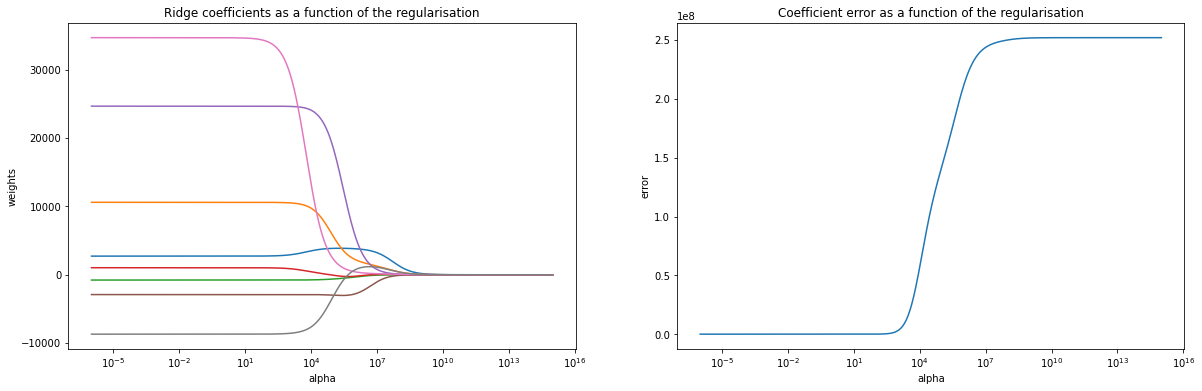

In [602]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(model_ridge_alphas, model_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(model_ridge_alphas, model_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()



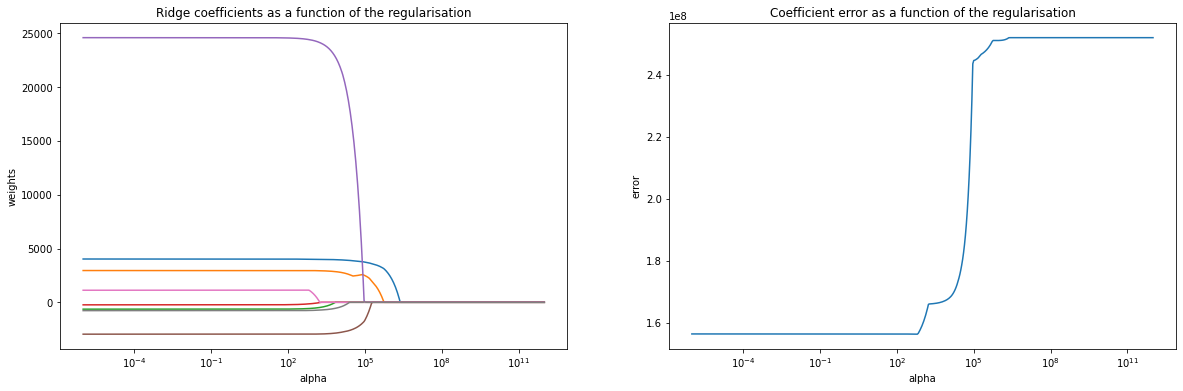

In [603]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(model_lasso_alphas, model_coefs_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(model_lasso_alphas, model_errors_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [604]:
model_optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
model_optimal_ridge.fit(X_train, y_train)
model_optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10,tol=1,max_iter=1000)
model_optimal_lasso.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-0...
       4.10265811e+04, 4.71375313e+04, 5.41587138e+04, 6.22257084e+04,
       7.14942899e+04, 8.21434358e+04, 9.43787828e+04, 1.08436597e+05,
       1.24588336e+05, 1.43145894e+05, 1.64467618e+05, 1.88965234e+05,
       2.17111795e+05, 2.49450814e+05, 2.86606762e+05, 3.29297126e+05,
       3.78346262e+05, 4.34701316e+05, 4.99450512e+05, 5.73844165e+05,
       6.59318827e+05, 7.57525026e+05, 8.70359136e+05, 1.00000000e+06]),
        cv=10, tol=1)

In [607]:
model_y_predicted_Linear_r = model_Linear_r.predict(X_test)
model_y_predicted_Ridge = model_optimal_ridge.predict(X_test)
model_y_predicted_Lasso = model_optimal_lasso.predict(X_test)



In [608]:
model_r2_score_Linear_r=r2_score(y_test,model_y_predicted_Linear_r)
model_r2_score_Ridge=r2_score(y_test,model_y_predicted_Ridge)
model_r2_score_Lasso=r2_score(y_test,model_y_predicted_Lasso)
print('R2 score Linear Regression:', model_r2_score_Linear_r)
print('R2 score Ridge Regression:', model_r2_score_Ridge)
print('R2 score Lasso Regression:', model_r2_score_Lasso)

R2 score Linear Regression: 0.5816274196774662
R2 score Ridge Regression: 0.581627798985318
R2 score Lasso Regression: 0.5733690181192759


In [154]:
Linear_r=LinearRegression()

In [155]:
Linear_r.fit(X_train,y_train)
Linear_r.intercept_,Linear_r.coef_


(array([-21543780.78677055]),
 array([[ 7104.04440984,  3845.90224855,  -454.372933  ,  2720.5715577 ,
          1032.9242957 , 24684.92905188, -5210.3986876 , -2896.71805691,
         34759.26939724]]))

In [156]:
y_pred_class = Linear_r.predict(X_test)
Linear_r.score(X_test, y_test)

0.5816255919867386

In [ ]:
Linear_r.fit(X_train,y_train)
Linear_r.score(X_test, y_test)

In [157]:
y_predicted = Linear_r.predict(X)

print("m: {0}".format(Linear_r.coef_))
print("b: {0}".format(Linear_r.intercept_))
print("R^2: "+ str(Linear_r.score(X, Y)))

residuals = Y-y_predicted

m: [[ 7104.04440984  3845.90224855  -454.372933    2720.5715577
   1032.9242957  24684.92905188 -5210.3986876  -2896.71805691
  34759.26939724]]
b: [-21543780.78677055]
R^2: 0.5813216120135456


In [158]:
residuals

,resale_price
0,-7085.928233
1,-11502.834875
2,-3290.126319
3,-27695.626929
4,-290.126319
...,...
105470,41169.600357
105471,31430.794315
105472,99581.895334
105473,44828.007136


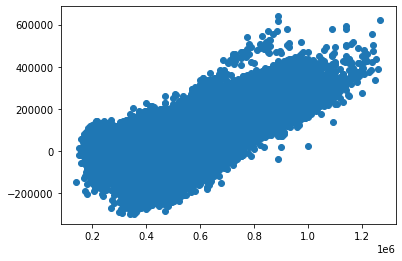

In [162]:
plt.scatter(Y,residuals)


In [ ]:
from sklearn.neighbors import